# LGM (Data Science) VIP

# Task 3- Prediction using Decision Tree  Algorithm

Author: Komal Tharkar

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
df=pd.read_csv("C:\\Users\\komal\\Downloads\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Correlation Matrix

In [8]:
corr=df.corr()

<AxesSubplot:>

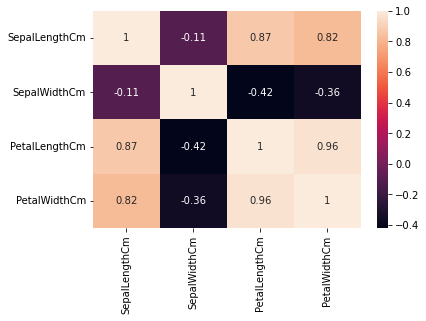

In [9]:
sns.heatmap(corr,annot=True)

## Label Encoding

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
species=df.iloc[:,-1]
le.fit(species)
df.iloc[:,-1]=le.transform(species)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Training_Testing Dataset 

In [11]:
x=df.iloc[:,0:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Model- Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_predict=DT.predict(x_test)
y_predict

array([0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 1, 1, 0])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9333333333333333


In [16]:
confusion_matrix(y_predict,y_test)

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]], dtype=int64)

In [17]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.82      0.90        11\n           2       0.82      1.00      0.90         9\n\n    accuracy                           0.93        30\n   macro avg       0.94      0.94      0.93        30\nweighted avg       0.95      0.93      0.93        30\n'

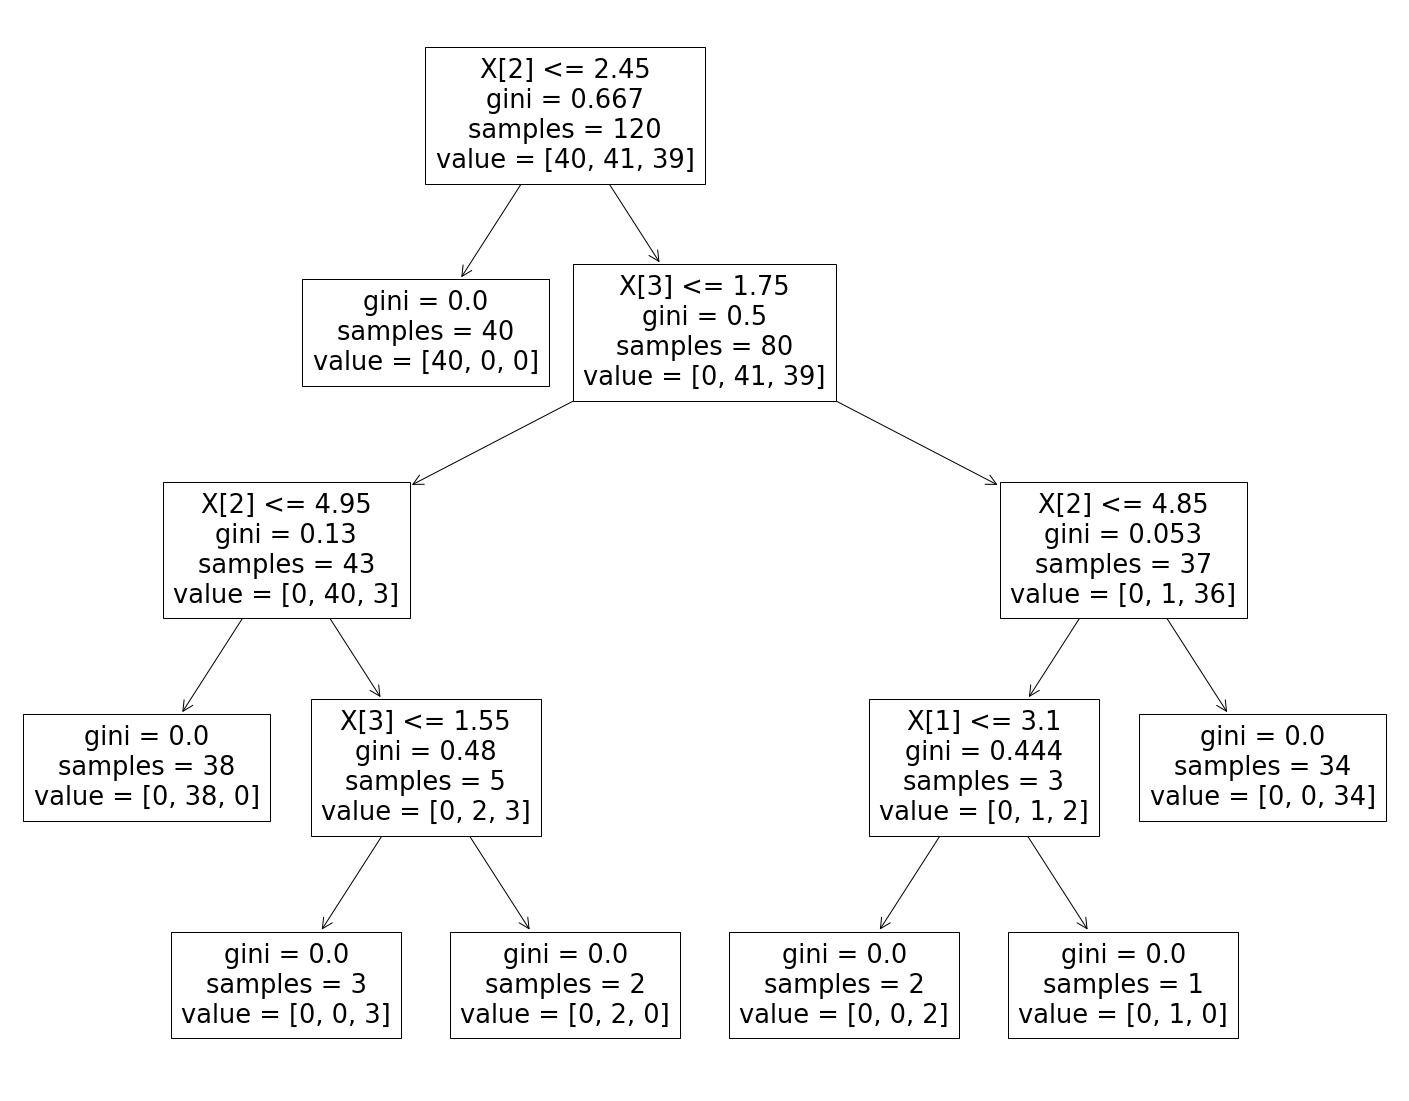

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT)

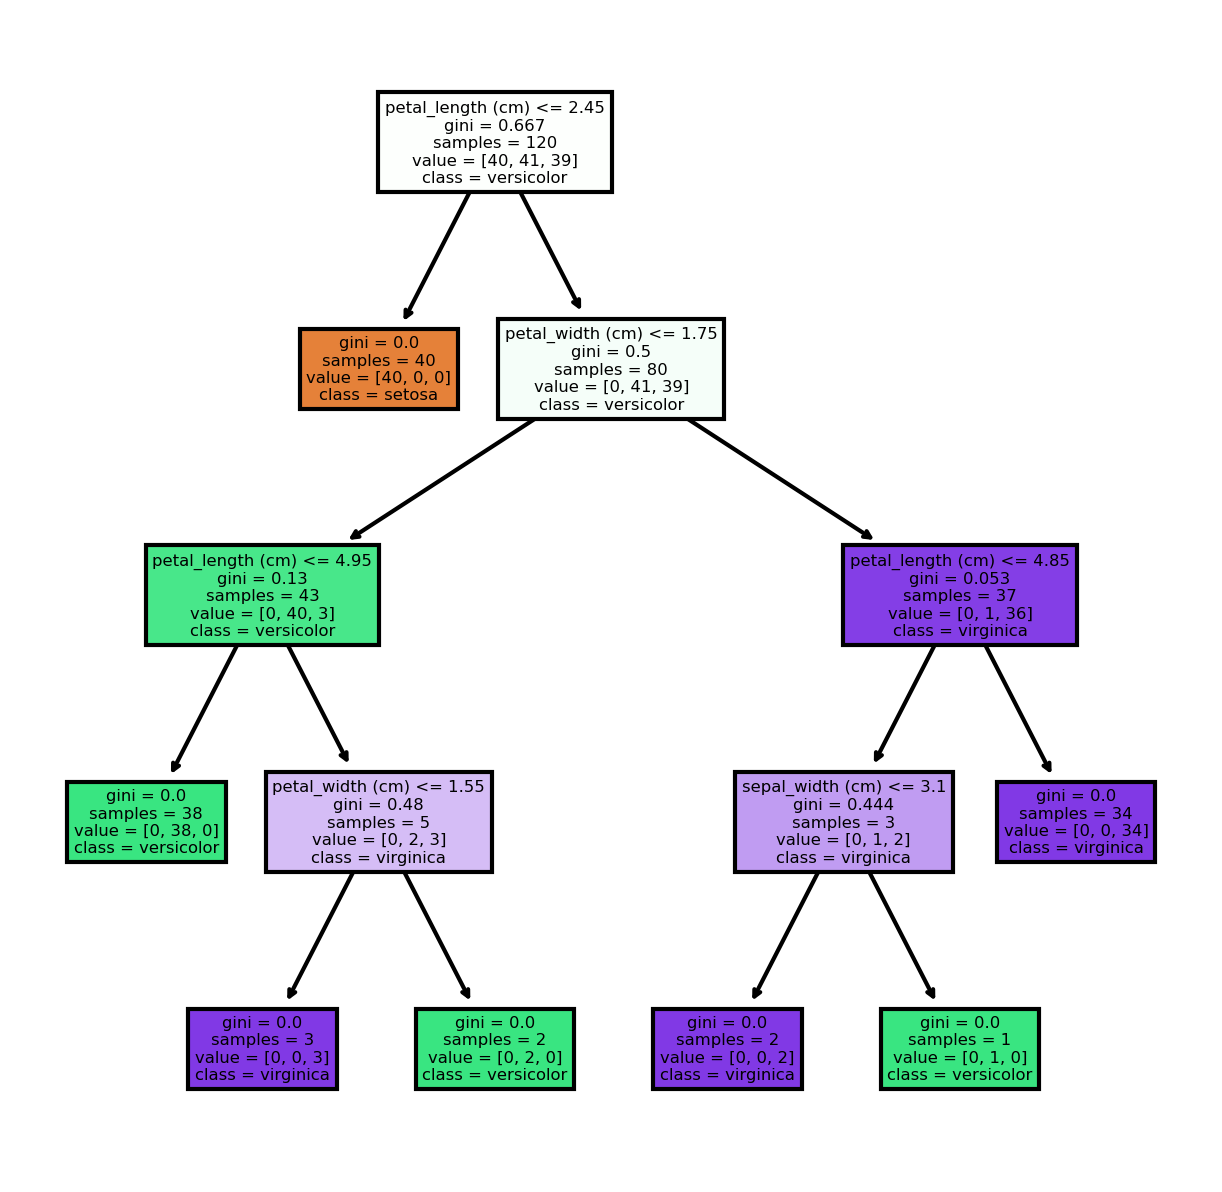

In [19]:
fn=['sepal_length (cm)','sepal_width (cm)','petal_length (cm)','petal_width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(DT,
               feature_names = fn, 
               class_names=cn,
               filled = True);